In [1]:
# importing general packages

import numpy as np
import os, sys
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

plt.rc('font', family='serif', size=20)
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

%matplotlib inline

In [2]:
def d(N,g,P):
    """d in cm, g in GeV^-1, N in cm^-2"""
    pc2cm = 3.086e+18 
    a = 8.4e-54
    g0 = 1e-11
    d0 = 1e7*pc2cm
    return d0*((0.1/P)*(N/a)*(g0/g)**4)**(-1./2) # in cm

In [17]:
d(N=2.76e-54, g=1e-11, P=0.1)*3.24078e-25

17.447394210256796

In [4]:
N_low = 5.63e-55 #cm^-2
N_medium = 2.76e-54
N_high = 6.11e-54
g0 = 1e-11

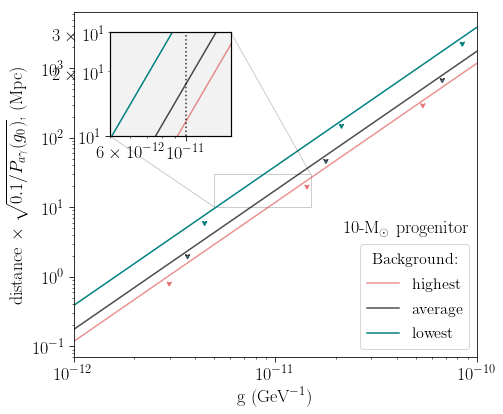

In [52]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# 10 solar masses

pc2cm = 3.086e+18 
P = 0.1 

g = np.linspace(1e-12, 1e-10, 1000)
distances0 = d(N_low, g, P)*3.24078e-25 # from cm to Mpc
distances1 = d(N_medium, g, P)*3.24078e-25 # from cm to Mpc
distances2 = d(N_high, g, P)*3.24078e-25 # from cm to Mpc

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

fig = plt.figure(figsize=(7,6))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.22, 0.62, 0.26, 0.26])

ax1.plot(g, distances2, color = 'C3', alpha=0.5,label="highest")
ax1.plot(g, distances1, 'k-', alpha=0.7, label="average")
ax1.plot(g, distances0, color='#008080', label="lowest")
ax1.set_xlabel('g (GeV$^{-1}$)',fontsize=18)
ax1.set_ylabel('distance $\\times$ $\sqrt{0.1/P_{a\gamma}(g_0)}$, (Mpc)', fontsize=18)
ax1.set_xlim(1e-12,1e-10)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.annotate('10-M$_{\\odot}$ progenitor', xy=(0.67, 0.35), xycoords='axes fraction', size=18)
legend=ax1.legend(title="Background:", loc='lower right', fontsize=16)
plt.setp(legend.get_title(),fontsize='16')

ax1.annotate("", xytext=(g[-155], distances0[-270]), xy=(g[-155], distances0[-270]-14) , arrowprops=dict(arrowstyle="fancy",color='#008080'))
ax1.annotate("", xytext=(g[-330], distances1[-400]), xy=(g[-330], distances1[-400]-19) , arrowprops=dict(arrowstyle="fancy", alpha = 0.7))
ax1.annotate("", xytext=(g[-465], distances2[-510]), xy=(g[-465], distances2[-510]-20) , arrowprops=dict(arrowstyle="fancy",color = 'C3', alpha=0.5))

ax1.annotate("", xytext=(g[-795], distances0[-820]), xy=(g[-795], distances0[-820]-0.85) , arrowprops=dict(arrowstyle="fancy",color='#008080'))
ax1.annotate("", xytext=(g[-830], distances1[-850]), xy=(g[-830], distances1[-850]-1.4) , arrowprops=dict(arrowstyle="fancy", alpha = 0.7))
ax1.annotate("", xytext=(g[-865], distances2[-880]), xy=(g[-865], distances2[-880]-1.3) , arrowprops=dict(arrowstyle="fancy",color = 'C3', alpha=0.5))

ax1.annotate("", xytext=(g[35], distances0[28]), xy=(g[35], distances0[28]-0.04) , arrowprops=dict(arrowstyle="fancy",color='#008080'))
ax1.annotate("", xytext=(g[27], distances1[23]), xy=(g[27], distances1[23]-0.06) , arrowprops=dict(arrowstyle="fancy", alpha = 0.7))
ax1.annotate("", xytext=(g[20], distances2[16]), xy=(g[20], distances2[16]-0.05) , arrowprops=dict(arrowstyle="fancy",color = 'C3', alpha=0.5))


ip = InsetPosition(ax1, [0.09,0.64,0.3,0.3])
ax2.set_axes_locator(ip)
mark_inset(ax1, ax2, loc1=3, loc2=1, ec='k', alpha=0.2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.plot(g, distances2, color = 'C3', alpha=0.5,label="highest")
ax2.plot(g, distances1, 'k-', alpha=0.7, label="average")
ax2.plot(g, distances0, color='#008080', label="lowest")
ax2.set_ylim(10,30)
ax2.set_xlim(5e-12,1.5e-11)
ax2.axvline(1e-11, color='k',linestyle = ':', alpha=0.8)

#ax2.tick_params(color='k', labelcolor='k')
ax2.set_facecolor((0.95,0.95,0.95))
for spine in ax2.spines.values():
    spine.set_edgecolor('k')
    spine.set_linewidth(1.2)
# ax2.tick_params(axis='both', labelsize=12)


# # ax2.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('10M_distance_coupl_log2.pdf', bbox_inches='tight')

plt.show()